<a href="https://colab.research.google.com/github/marzx04/github-slideshow/blob/master/RetoCemex_Equipo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploración de datos del Reto

##Instrucciones

A partir del set de datos del Reto, obtener:

1. Métricas estadísticas de cada una de las variables.
2. Conteo de registros y datos faltantes.
3. Estimación y visualización de las distribuciones de cada variable.

####Instalar librerias y actualizar algunos paquetes

In [ ]:
pip install fitter

In [ ]:
pip install --upgrade xgboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fitter import Fitter
from scipy import stats
from google.colab import drive
drive.mount('/content/gdrive')

In [79]:
data = pd.read_csv('/content/gdrive/MyDrive/Data Science /Reto_Cemex/reto_data.csv')
data.head()

TIME  Dureza  Tasa_Prod   Asp    EC    EE  Calidad
0  01/01/1995 0:00   100.0        368  2.78  15.1  29.7    0.053
1  02/01/1995 0:00   100.0        426  3.00  26.9   0.0    0.108
2  03/01/1995 0:00   101.0        446  3.00  29.5   0.0    0.098
3  04/01/1995 0:00    99.0        395  3.00  18.9  25.4    0.056
4  05/01/1995 0:00   102.0        380  3.00  17.5  26.6    0.051

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9392 entries, 0 to 9391
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TIME       9392 non-null   object 
 1   Dureza     9391 non-null   float64
 2   Tasa_Prod  9392 non-null   int64  
 3   Asp        9391 non-null   float64
 4   EC         9392 non-null   float64
 5   EE         9392 non-null   float64
 6   Calidad    9392 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 513.8+ KB


## Métricas estadísticas de cada una de las variables

A continuación se pueden observar las métricas de cada una de las variables.

En la columna "Dureza" parecen ser normales todos los valores, no creo que haya outliers. Esto ocurre también en las columnas "Tasa_Prod" y "Asp". Sin embargo, las columnas "EC", "EE" y "Calidad" parecen tener más variación. Especialmente, la columna "EC" presenta una media de aproximadamente 20 y el tercer cuartil es de casi 24, pero el valor máximo se dispara a 40. Considerando el punto mínimo, esperaría ver los datos distribuidos equitativamente entre bajos y altos, igual que en las columnas "EE" y "Calidad".

In [81]:
olddata = data.copy() 
data.describe()

Dureza    Tasa_Prod  ...           EE      Calidad
count  9391.000000  9392.000000  ...  9392.000000  9392.000000
mean    104.028644   391.005111  ...    19.059135     0.089891
std       2.049060    43.352777  ...     8.035162     0.048819
min      80.000000     0.000000  ...     0.000000     0.000000
25%     103.000000   383.000000  ...    14.200000     0.061000
50%     104.000000   398.000000  ...    20.000000     0.081000
75%     105.000000   408.000000  ...    25.200000     0.107000
max     112.000000   480.000000  ...    35.300000     1.000000

[8 rows x 6 columns]

## Conteo de registros y datos faltantes
Primero decidí desplegar la información general del data frame. Decidí desde un principio cambiar el tipo de dato del atributo "TIME" a datetime, ya que antes era un object.
Al ver el conteo de los datos parece que únicamente hay 2 datos faltantes, uno en la columna "Dureza" y otro en la columna "Asp". Al buscar cuántos datos hay faltantes con la función isnull() puedo verificar que en efecto únicamente hay 2 datos faltantes.

In [82]:
data['TIME']= pd.to_datetime(data['TIME'], dayfirst=True)

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9392 entries, 0 to 9391
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   TIME       9392 non-null   datetime64[ns]
 1   Dureza     9391 non-null   float64       
 2   Tasa_Prod  9392 non-null   int64         
 3   Asp        9391 non-null   float64       
 4   EC         9392 non-null   float64       
 5   EE         9392 non-null   float64       
 6   Calidad    9392 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 513.8 KB


In [84]:
data.isnull().any(axis=1).sum()

2

In [85]:
data[data.isna().any(axis=1)]

TIME  Dureza  Tasa_Prod   Asp    EC    EE  Calidad
60 1995-03-02     NaN        402  2.93  26.7  15.8    0.093
62 1995-03-04   103.0        391   NaN  20.3  20.3    0.093

##Estimación y visualización de las distribuciones de cada variable

Al generar gráficas de las diferentes variables puedo apreciar de mejor manera los datos. En primer lugar, me alegra ver que parece haber la misma cantidad de entradas cada año, lo cual me hace pensar que el data set tiene mucho potencial.

En segundo lugar, me parece que hay variables que tienen algunos outliers, a pesar de que las medidas estádisticas parecían decir lo contrario. Todas las variables, a excepción de la energía eléctrica y el tiempo, parecen tener algunos outliers.

sumsquare_error          aic            bic  kl_div
exponnorm         0.000237  1221.804539 -164275.712752     inf
skewnorm          0.000239   986.790428 -164206.288529     inf
norm              0.000241  1171.903413 -164129.552392     inf
t                 0.000247   590.765324 -163876.849612     inf

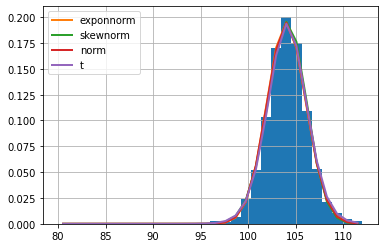

In [86]:
distDureza = Fitter(data['Dureza'].dropna(),bins=30,
                    distributions=['exponnorm','skewnorm','t','norm'],
                    timeout= 60)
distDureza.fit()
distDureza.summary()

Text(0.5, 1.0, 'Distribución de Dureza')

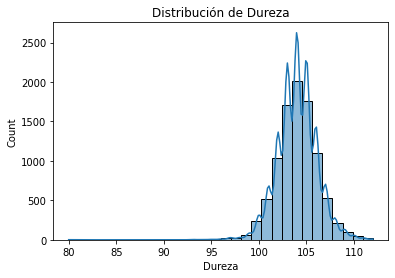

In [87]:
sns.histplot(x=data['Dureza'],bins=30 ,kde=True)
plt.title('Distribución de Dureza')

Text(0.5, 1.0, 'Dureza: Gráfico de Caja y Bigotes')

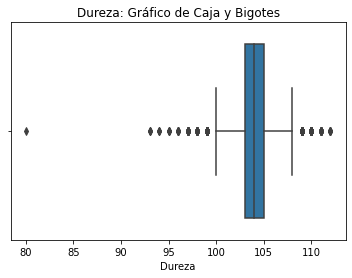

In [88]:
sns.boxplot(x =data['Dureza'])
plt.title('Dureza: Gráfico de Caja y Bigotes')

sumsquare_error          aic           bic  kl_div
cauchy          15.997138   677.520691 -59850.243215     inf
gumbel_l        17.014678  1065.565703 -59271.132428     inf
laplace         17.462652  1070.283943 -59027.079020     inf
norm            24.522173  1977.244132 -55838.709552     inf

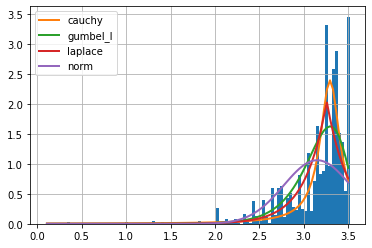

In [89]:
distAsp = Fitter(data['Asp'].dropna(), distributions = ['cauchy', 'gumbel_l', 'laplace', 'norm'])
distAsp.fit()
distAsp.get_best()
distAsp.summary()

Text(0.5, 1.0, 'Distribución de Asp')

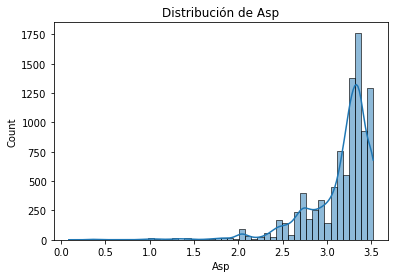

In [90]:
sns.histplot(x=data['Asp'],bins=50,kde=True)
plt.title('Distribución de Asp')

Text(0.5, 1.0, 'Asp: Gráfico de Caja y Bigotes')

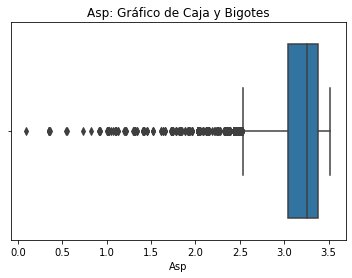

In [91]:
sns.boxplot(x =data['Asp'])
plt.title('Asp: Gráfico de Caja y Bigotes')

sumsquare_error           aic           bic  kl_div
gumbel_r            3.573166   2134.988922 -73935.829051     inf
genlogistic         3.587056   2137.966290 -73890.242728     inf
weibull_max         3.895721   2117.498930 -73114.963036     inf
norm              105.591690  10138.210365 -42133.318880     inf

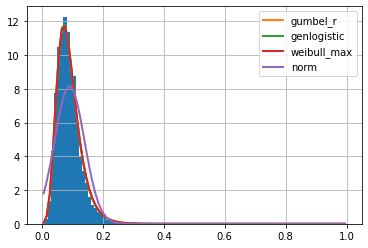

In [92]:
distCalidad = Fitter(data['Calidad'], distributions=['gumbel_r', 'genlogistic', 'weibull_max', 'norm'])
distCalidad.fit()
distCalidad.get_best()
distCalidad.summary(method='sumsquare_error')

Text(0.5, 1.0, 'Distribución de Calidad')

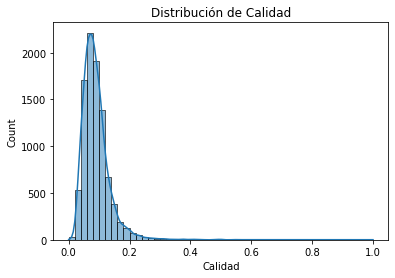

In [93]:
sns.histplot(x=data['Calidad'],bins=50,kde=True)
plt.title('Distribución de Calidad')

Text(0.5, 1.0, 'Calidad: Gráfico de Caja y Bigotes')

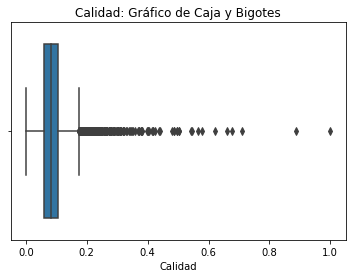

In [94]:
sns.boxplot(x =data['Calidad'])
plt.title('Calidad: Gráfico de Caja y Bigotes')

sumsquare_error         aic            bic  kl_div
dweibull         0.012872  875.157634 -126767.348555     inf
dgamma           0.012895  875.607720 -126750.984417     inf
gennorm          0.012927  873.761855 -126727.602214     inf
norm             0.017392  872.838036 -123949.812500     inf

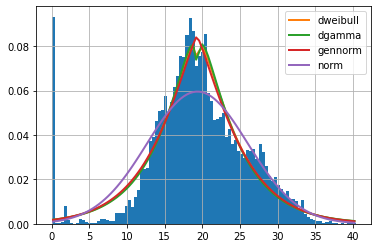

In [95]:
distEC = Fitter(data['EC'], distributions=['dweibull','dgamma','gennorm','norm'])
distEC.fit()
distEC.summary()

Text(0.5, 1.0, 'Distribución de Energía Calórica')

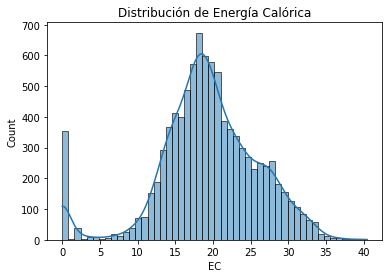

In [96]:
sns.histplot(x=data['EC'],bins=50,kde=True)
plt.title('Distribución de Energía Calórica')

Text(0.5, 1.0, 'Energía Calórica: Gráfico de Caja y Bigotes')

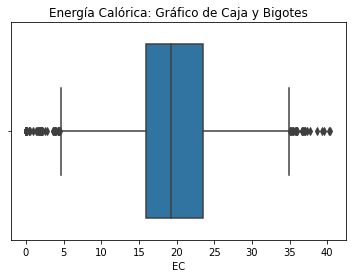

In [97]:
sns.boxplot(x =data['EC'])
plt.title('Energía Calórica: Gráfico de Caja y Bigotes')

sumsquare_error         aic            bic    kl_div
gumbel_l            0.021893  782.069262 -121788.450980  0.096267
genlogistic         0.023178  785.148213 -121243.434572  0.111026
logistic            0.023724  780.052162 -121034.249561  0.129304
norm                0.023999  768.453737 -120925.980230  0.131778

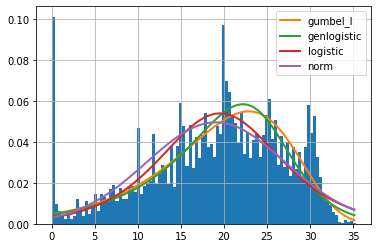

In [98]:
distEE = Fitter(data['EE'], distributions=['gumbel_l','genlogistic', 'logistic', 'norm'])
distEE.fit()
distEE.summary()

Text(0.5, 1.0, 'Distribución de Energía Eléctrica')

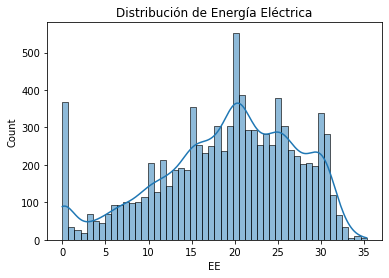

In [99]:
sns.histplot(x=data['EE'],bins=50,kde=True)
plt.title('Distribución de Energía Eléctrica')

Text(0.5, 1.0, 'Energía Eléctrica: Gráfico de Caja y Bigotes')

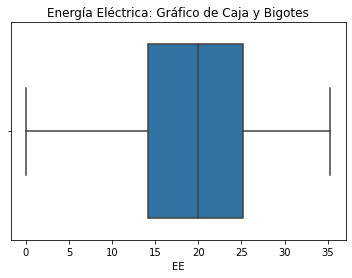

In [100]:
sns.boxplot(x =data['EE'])
plt.title('Energía Eléctrica: Gráfico de Caja y Bigotes')

sumsquare_error          aic            bic  kl_div
dweibull          0.000081  2078.480156 -174371.698862     inf
gennorm           0.000092  1925.554178 -173197.769836     inf
johnsonsu         0.000144  1793.603437 -168974.337226     inf
norm              0.001131  3176.602867 -149620.651852     inf

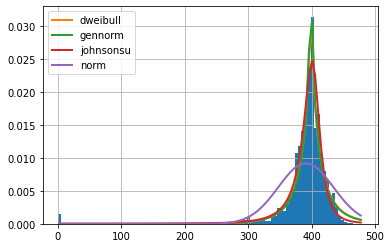

In [101]:
distTprod = Fitter(data['Tasa_Prod'],distributions=['dweibull','gennorm','johnsonsu','norm'])
distTprod.fit()
distTprod.summary()

Text(0.5, 1.0, 'Distribución de Tasa de Producción')

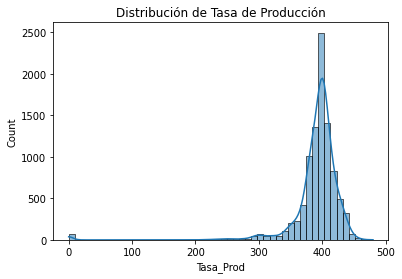

In [102]:
sns.histplot(x=data['Tasa_Prod'],bins=50,kde=True)
plt.title('Distribución de Tasa de Producción')

Text(0.5, 1.0, 'Tasa de Producción: Gráfico de Caja y Bigotes')

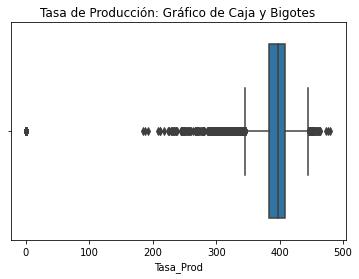

In [103]:
sns.boxplot(x =data['Tasa_Prod'])
plt.title('Tasa de Producción: Gráfico de Caja y Bigotes')

# Outliers y Normalización de datos

## Instrucciones

1. Eliminar los nan values del conjunto de datos.
2. Diseñar un filtro gaussiano para la eliminación de outliers como fue visto en clase.
3. Aplicar una normalización con respecto a la tasa de producción.



##Valores no núméricos

Considerando que de 9,392 muestras únicamente hay 2 datos faltantes considero que no sería significativo eliminar los datos faltantes. 
Sin embargo, al observar los datos de las demás columnas pienso que valdría la pena rellenar los datos. Especialmente considero que esto sería lo más conveniente ya que tenemos la ventaja de trabajar con datos que estan ordenados por fecha, lo cual puede indicar algún tipo de tendencia. De igual manera, las filas que presentan los datos faltantes presentan únicamente un dato faltante. Por lo cual he decididó rellenar los 2 datos faltantes.

In [104]:
data.fillna(method='ffill', axis=0, inplace=True)
print(data[data.isna().any(axis=1)])
print(data.iloc[60], data.iloc[62], sep="\n")

Empty DataFrame
Columns: [TIME, Dureza, Tasa_Prod, Asp, EC, EE, Calidad]
Index: []
TIME         1995-03-02 00:00:00
Dureza                       105
Tasa_Prod                    402
Asp                         2.93
EC                          26.7
EE                          15.8
Calidad                    0.093
Name: 60, dtype: object
TIME         1995-03-04 00:00:00
Dureza                       103
Tasa_Prod                    391
Asp                         2.93
EC                          20.3
EE                          20.3
Calidad                    0.093
Name: 62, dtype: object


##Filtros Gaussianos

Para eliminar valores atípicos de nuestro dataset utilizaremos 2 filtros Gaussianos que posteriorimente serán comparados para obtener el mejor, en el primero calcularemos los valores Z de cada columna, con esto podemos definir que usaremos 3 desviaciones estándar para eliminar así los extremos de nuestra campana, siendo estos no representativos y ayudando así al preprocesamiento en general al tener estos datos más limpios.

En el segundo se optó por un acercamiento de cuartiles donde se eliminarons los elementos más lejanos al primero y el tercero amplificando los valores de estos para tener una medida real sobre qué tan alejados están los valores.

Los objetos dataframe de pandas son indexables de manera sencilla. Es por eso que se pueden obtener nuevos arreglos a partir de condiciones dentro del index utilizando el operador de acceso [ ]. A partir de aquí calculamos los valores Z de cada elemento de cada columna, revisamos todos los que sean atípicos, que podemos afirmar son los que tienen un valor Z mayor a 3 desviaciones estándar. Tomamos el valor absoluto de esto porque queremos elimnar ambas colas, y finalmente aplicamos esto a todas las columnas.

In [105]:
data_gaussian_z = data[(np.abs(stats.zscore(data[['Dureza','Asp','Calidad',
                                                  'EE','EC','Tasa_Prod']]
                                            )) < 3).all(axis=1)]

data_gaussian_z.info()
data_gaussian_z.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9005 entries, 0 to 9391
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   TIME       9005 non-null   datetime64[ns]
 1   Dureza     9005 non-null   float64       
 2   Tasa_Prod  9005 non-null   int64         
 3   Asp        9005 non-null   float64       
 4   EC         9005 non-null   float64       
 5   EE         9005 non-null   float64       
 6   Calidad    9005 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 562.8 KB


Dureza    Tasa_Prod  ...           EE      Calidad
count  9005.000000  9005.000000  ...  9005.000000  9005.000000
mean    104.041088   395.356580  ...    19.229828     0.086796
std       1.942155    24.371345  ...     7.886463     0.036942
min      98.000000   269.000000  ...     0.000000     0.000000
25%     103.000000   384.000000  ...    14.600000     0.061000
50%     104.000000   398.000000  ...    20.100000     0.081000
75%     105.000000   409.000000  ...    25.300000     0.106000
max     110.000000   480.000000  ...    35.300000     0.236000

[8 rows x 6 columns]

La implementación del segundo filtro necesita preparación previa. Para este obtenemos los cuartiles de nuestro dataset y elimina todo lo que esté muy alejados del primero o del tercero. Definimos los valores más lejanos con la multiplicación 1.5 para revisar si la distancia es realmente grande y un OR para encontrar los valores de ambos extremos. Usando este método se eliminan ambas colas.

In [106]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
MR = Q3-Q1
data_gaussian_quantile = data[['Dureza','Asp','Calidad','EE',
                               'EC','Tasa_Prod']
                              ][~((data[['Dureza','Asp','Calidad','EE',
                                         'EC','Tasa_Prod']] < (Q1 - 1.5 * MR)
                                         )|(data[['Dureza','Asp','Calidad','EE',
                                                  'EC','Tasa_Prod']] > 
                                            (Q3 + 1.5 * MR))).any(axis=1)]

data_gaussian_quantile.info()
data_gaussian_quantile.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7569 entries, 0 to 9390
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Dureza     7569 non-null   float64
 1   Asp        7569 non-null   float64
 2   Calidad    7569 non-null   float64
 3   EE         7569 non-null   float64
 4   EC         7569 non-null   float64
 5   Tasa_Prod  7569 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 413.9 KB


Dureza          Asp  ...           EC    Tasa_Prod
count  7569.000000  7569.000000  ...  7569.000000  7569.000000
mean    103.963271     3.223175  ...    20.352226   398.684106
std       1.785904     0.244621  ...     5.237481    18.471500
min     100.000000     2.540000  ...     4.600000   346.000000
25%     103.000000     3.140000  ...    16.700000   387.000000
50%     104.000000     3.270000  ...    19.600000   399.000000
75%     105.000000     3.390000  ...    23.800000   410.000000
max     108.000000     3.520000  ...    34.900000   445.000000

[8 rows x 6 columns]

Al diseñar filtros gaussianos, todos los miembros del equipo coincidimos en usar el z-score con 3 desviaciones estándar. Sin embargo, yo propuse comparar los resultados con el método robusto, el cual usa los cuartiles del data frame como referencia para escoger los outliers.

Al comparar estos dos métodos coincidimos en que el z-score sería la mejor opción ya que se eliminan menos datos. Esto lo consideramos ya que el data set original no está muy contaminado y no deseamos deshacernos de todo eso. Consideramos que algunos de estos datos podrían explicar el comportamiento de la maquinaria.

In [107]:
data = data_gaussian_z
data

TIME  Dureza  Tasa_Prod   Asp    EC    EE  Calidad
0    1995-01-01   100.0        368  2.78  15.1  29.7    0.053
1    1995-01-02   100.0        426  3.00  26.9   0.0    0.108
2    1995-01-03   101.0        446  3.00  29.5   0.0    0.098
3    1995-01-04    99.0        395  3.00  18.9  25.4    0.056
4    1995-01-05   102.0        380  3.00  17.5  26.6    0.051
...         ...     ...        ...   ...   ...   ...      ...
9387 2020-09-13   104.0        413  3.52  16.9  24.8    0.108
9388 2020-09-14   101.0        408  3.52  21.7  13.9    0.061
9389 2020-09-15   100.0        352  3.52  15.6  17.6    0.031
9390 2020-09-16   100.0        399  3.52  17.0  22.8    0.059
9391 2020-09-17   101.0        413  2.03  18.8  18.7    0.058

[9005 rows x 7 columns]

##Comparación de métricas estadísticas
Al comparar las métricas estadísticas se puede ver que no hubo un cambio grande en el número de muestras, sin embargo las variables parecen estar más estables. Por ejemplo, si analizamos la variable Tasa_Prod, podemos ver que la desviación estándar disminuyó considerablemente y al ver los cuartiles podemos ver que se eliminaron aquellas variables que se encontraban muy por debajo de lo normal, como 0. Considero que está es la variable que más cambio.

Viendo las gráficas y la distribución que tiene cada variable, podemos ver que no hubo gran cambio, a excepción de la variable Dureza, la cual cuenta con una distribución T con un error muy pequeño.

Considero que es correcto que las variables no cuenten con una distribución normal, ya que no son perfectas y muestran cómo funciona un sistema con atibajos que puede ser optimizado. Pienso que la distribución de la variable Dureza pueda ser un indicador de un factor importante. Tal vez esta variable sea clave para la generación de un modelo de optimización.

In [108]:
pd.concat([olddata.describe(),data.describe()], axis=1)
newmetric = pd.DataFrame(olddata.describe())
oldmetric = pd.DataFrame(data.describe())

##Normalización de los datos

Finalmente aplicaremos una normalización min_max con respecto a la tasa de producción. Se utilizará esta dada su sencilla implementación a lo largo de un data set. Esto lo descubrimos individualmente al realizar algunas de las actividades de Kaggle y coincidimos como equipo en hacer la normalización min_max.

In [109]:
norm_data = data.copy()
production_min = data["Tasa_Prod"].min()
production_max = data["Tasa_Prod"].max()
for (col, _) in norm_data.iteritems():
  if col != 'TIME':
    norm_data[col] = (norm_data[col] - production_min) / (production_max - production_min) 
  else:
    continue   
norm_data.describe()

Dureza    Tasa_Prod  ...           EE      Calidad
count  9005.000000  9005.000000  ...  9005.000000  9005.000000
mean     -0.781796     0.598846  ...    -1.183745    -1.274470
std       0.009205     0.115504  ...     0.037377     0.000175
min      -0.810427     0.000000  ...    -1.274882    -1.274882
25%      -0.786730     0.545024  ...    -1.205687    -1.274592
50%      -0.781991     0.611374  ...    -1.179621    -1.274498
75%      -0.777251     0.663507  ...    -1.154976    -1.274379
max      -0.753555     1.000000  ...    -1.107583    -1.273763

[8 rows x 6 columns]

# Análisis de correlación entre las variables

## Instrucciones

1. Graficar las correlaciones entre las diversas variables con un mapa de calor. 
2. Analizar y comentar la correlación entre las variables asociadas al costo energético y cada una de las demás variables.

Como se puede observar en el mapa de calor, las variables del dataset de Cemex no están altamente correlacionadas. Las variables que están más altamente correlacionadas son:
* EE y EC – -0.45
* Tasa_Prod y Asp – 0.43
* Tasa_Prod y EC – 0.25
* Calidad y Dureza – 0.22
* Calidad y EE – 0.15
* Dureza y Asp – -0.13
* EE y Tasa_Prod – -0.12

Esto es bueno, ya que si alguna de las variables tuviera una alta correlación con otra (a excepción de la variable Target que es Calidad) presentaría un problema de multicolinearidad. Es decir, es probable que si se entrena un modelo con variables altamente correlacionadas, este no logre un buen resultado.

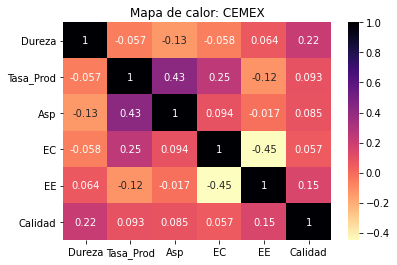

In [110]:
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.magma_r)
plt.title("Mapa de calor: CEMEX")
plt.show()

#Mix óptimo EE y EC
Esta actividad es crucial en el desarrollo del reto. A lo largo de esta actividad mi equipo y yo buscamos la manera de seleccionar los datos óptimos, es decir aquellas entradas con mayor calidad y menor precio. Esto con el fin de poder entrenar a un modelo de ML para predecir el mix pefecto de energías (EE y EC), el cual a su vez produce el costo mínimo para cierta calidad.

##Costo ponderado
El primer paso de esta actividad es calcular el costo diario, el costo ponderado y las energías ponderadas. Para hacer esto, mi compañera Isabel Moreno, utilizó una función lambda y la aplicó al cnojunto de datos, agregando las varibles nuevas. De igual manera, eliminamos todas las entradas cuyo costo fuera igaul a 0 ya que esto indicaba un error.

In [111]:
data['Costo'] = data['EE']+data['EC']*0.74
data['Costo_P'] = data.apply(lambda row: row['Costo']/row['Tasa_Prod'], axis = 1)
data['EC_P'] = data.apply(lambda row: row['EC']/row['Tasa_Prod'], axis = 1)
data['EE_P'] = data.apply(lambda row: row['EE']/row['Tasa_Prod'], axis = 1)

In [112]:
data[data['Costo'] == 0.0]

TIME  Dureza  Tasa_Prod   Asp  ...  Costo  Costo_P  EC_P  EE_P
7122 2014-07-02   108.0        360  2.94  ...    0.0      0.0   0.0   0.0
7993 2016-11-19   101.0        403  3.34  ...    0.0      0.0   0.0   0.0
7994 2016-11-20   102.0        405  3.40  ...    0.0      0.0   0.0   0.0
7995 2016-11-21   105.0        405  3.40  ...    0.0      0.0   0.0   0.0
9095 2019-11-26   101.0        298  2.13  ...    0.0      0.0   0.0   0.0
9106 2019-12-07    99.0        299  2.21  ...    0.0      0.0   0.0   0.0
9107 2019-12-08    99.0        339  2.52  ...    0.0      0.0   0.0   0.0

[7 rows x 11 columns]

In [113]:
indexname = data[data['Costo'] == 0.0].index
data.drop(indexname, inplace= True)

In [114]:
data['Costo_P'].describe()

count    8998.000000
mean        0.085518
std         0.018669
min         0.000259
25%         0.074245
50%         0.087045
75%         0.099502
max         0.149628
Name: Costo_P, dtype: float64

In [115]:
data['Calidad'].describe()

count    8998.000000
mean        0.086785
std         0.036907
min         0.000000
25%         0.061000
50%         0.081000
75%         0.106000
max         0.236000
Name: Calidad, dtype: float64

##Visualización de Costo Ponderado y Cantidad y Dureza y Energías
Ya que se han calculado las columnas nuevas, es importante entender cómo se relacionan con el resto de los datos. Es por esto que genere un mapa de calos y diversas gráficas que claramente describen a los datos.

In [116]:
import plotly.express as px
import plotly.offline as iplot
import plotly.graph_objs as go

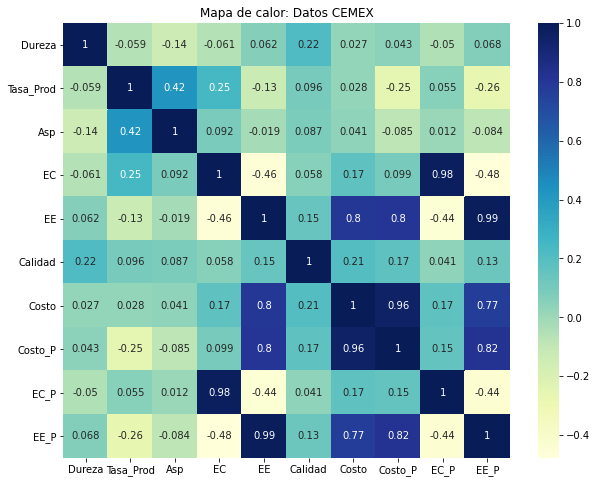

In [117]:
cor = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(cor, annot=True, cmap="YlGnBu")
plt.title("Mapa de calor: Datos CEMEX")
plt.show()

In [177]:
fig = px.scatter(data, x='Calidad', y ='Costo_P',marginal_y='histogram',
                 marginal_x='histogram',color='Costo_P')
fig.show()

In [178]:
fig = px.scatter(data, x='Dureza', y ='Costo_P', marginal_x='histogram',
                 marginal_y='histogram',color='Costo_P')
fig.show()

In [179]:
fig = px.scatter(data, x='Calidad', y ='Dureza',marginal_y='histogram',
                 marginal_x='histogram',color='Costo_P')
fig.show()

In [180]:
fig = px.scatter(data, x='Tasa_Prod', y ='Costo_P', marginal_x='histogram',
                 marginal_y='histogram',color='Costo_P')
fig.show()

In [181]:
fig = px.scatter(data, x='EE', y ='EC', marginal_x='histogram', 
                 marginal_y='histogram',color='Costo_P')
fig.show()

In [182]:
fig = px.scatter(data, x='EE', y ='EC', marginal_x='histogram', 
                 marginal_y='histogram',color='Calidad')
fig.show()

In [183]:
trace1 = go.Scatter3d(
    x=data['Calidad'],
    y=data['EE_P'],
    z=data['EC_P'],
    mode='markers',
    marker=dict(
        size=5,
        color=data['Calidad'], # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.6
    )
)

In [184]:
my_data = [trace1]

my_layout = go.Layout(
    title='Datos del Reto',
    scene=dict(
        xaxis=dict(
            title='Calidad'
        ),
        yaxis=dict(
            title='EE_P'
        ),
        zaxis=dict(
            title='EC_P'
        )
    )
)

In [185]:
fig = go.Figure(data=my_data, layout=my_layout)
fig.show()

##Separar valores óptimos
Seguido de calcular el costo ponderado, se creo una copia del data set original. En el data set original, hice una columna nueva en la que separé por intervalos los valores de 'Calidad'. 

Después de hacer esto, use la función groupby para encontrar en cada grupo de Calidad el costo mínimo. Usando la función aggregate (agg) genere un dataframe nuevo con las variables óptimas de Costo Ponderado, EE y EC. Los valores de las variables originales fueron sobreescritas por los valores óptimos que encontre. Esto con el fin de que el modelo tenga más datos con los cuales trabajar.

In [127]:
data['Calidad_Bins'] = pd.qcut(data['Calidad'],q=200, duplicates='drop')

In [128]:
value_counts = data['Calidad_Bins'].value_counts()
print(value_counts)

(0.065, 0.066]      193
(0.057, 0.058]      188
(0.054, 0.055]      185
(0.069, 0.07]       175
(0.08, 0.081]       175
                   ... 
(0.134, 0.135]       16
(0.041, 0.04177]      0
(0.138, 0.1383]       0
(0.1, 0.1009]         0
(0.088, 0.08826]      0
Name: Calidad_Bins, Length: 122, dtype: int64


In [129]:
data2 = data.copy()

### Selección de mínimos costos por cada bin de calidad

Para la selección de datos óptimos, primero separamos los datos por bines muy finos respecto a la calidad. Seguido de esto, buscamos por cada bin de calidad la entrada con el menor precio. Al encontrar esto, mapeamos los datos de las energías y el costo ponderado, con el fin de aumentar los datos para alimentar al modelo.

In [ ]:
# Agrupación del dataset
groups = data.groupby(['Calidad_Bins'])['Costo_P']
# Ignoramos el primer valor que se desempaca, es una tupla de etiquetas
for _, group in groups:
  if len(group):
    # Obtenemos la lista de los índices de este grupo y 
    # el índice del valor mínimo al que hay que aspirar
    idx_list = group.index.tolist()
    target_idx = group.idxmin()
    # Iteramos sobre los índices y sobreescribimos
    for idx in idx_list:
      data2['EE'][idx] = data2['EE'][target_idx]
      data2['EC'][idx] = data2['EC'][target_idx]
      data2['Costo_P'][idx] = data2['Costo_P'][target_idx]
      data2['Costo'][idx] = data2['Costo'][target_idx]

In [131]:
data2.describe()

Dureza    Tasa_Prod  ...         EC_P         EE_P
count  8998.000000  8998.000000  ...  8998.000000  8998.000000
mean    104.042565   395.385308  ...     0.049346     0.049002
std       1.940332    24.327334  ...     0.016127     0.020562
min      98.000000   269.000000  ...     0.000000     0.000000
25%     103.000000   384.000000  ...     0.041005     0.035979
50%     104.000000   398.000000  ...     0.048620     0.050756
75%     105.000000   409.000000  ...     0.059530     0.064775
max     110.000000   480.000000  ...     0.104792     0.128996

[8 rows x 10 columns]

##Modelos ML

###Separar variables de entrenamiento y de prueba

Los datos que se ingresarán al modelo para que haga predicciones serán la calidad, la dureza y la tasa de producción. El modelo deberá predecir la energía eléctrica y calórica y el costo ponderado. Usaremos el 70% de los datos para entrenamiento y el restante 30% como test.

In [132]:
X = data2.loc[:,['Dureza','Calidad','Tasa_Prod']]
y = data2.loc[:,['EE','EC','Costo_P']]

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=227)

In [134]:
y_train_EE = y_train.iloc[:, 0]
y_train_EC = y_train.iloc[:, 1]
y_train_costo = y_train.iloc[:, 2]

# Entrenamiento de modelos

Buscando obtener la mejor regresión posible entrenamos una serie de modelos, evaluandolos con un conjunto de pruebas y finalmente almacenando métricas.

##XGB Regressor
Después de separar los datos, los ingrese a un modelo de XGBoost (regresor) para obtener las enrgías y costos óptimos por calidad. Las métricas que use para medir los modelos fueron R2 y Mean Squared Log Error, siguiendo el consejo del profesor Pedro. Al investigar un poco más acerca de este tipo de error, entendí que en este caso es adecuado usar este error, ya que los datos ya han sido normalizados y este tipo de error castiga menos a los errores grandes (teniendo en cuenta que los valores dentro del dataset son distantes).

Un descubrimiento interesante que hizo mi compañero Alberto Cortés fue que las versiones de xgboost que se encuentran de manera local y en Google Colab son diferentes. Esto hace que el modelo que se corre de manera local sea mucho mejor que el modelo que se corre en Google Colab. Para evitar este problema instalamos la versión más actual de xgboost en la libreta de Google Colab. 

Otra de las cosas que hicimos fue crear un diccionario para guardar los resultados de cada modelo. 

En la predicción de XGBRegressor se estableció un ciclo para eliminar predicciones negativas, ya que estas no tienen sentido. En algunas iteraciones de entrenamiento aparecían y se estableció esta medida de seguridad para los 4 valores que mostraban este comportamiento, con la finalidad de evitar que fallara el error logístico.

In [135]:
from sklearn.metrics import mean_squared_log_error as MSE_log
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score

results = {"algorithm":[], "msle":[], "r2":[]}

In [136]:
from xgboost import XGBRegressor

xgb = XGBRegressor(objective='reg:squarederror')
multioutputregressor = MultiOutputRegressor(xgb).fit(X_train, y_train)
xgb1_pred = multioutputregressor.predict(X_test) 

for idx, row in enumerate(xgb1_pred):
     for idx2, val in enumerate(row):
         if val < 0:
             xgb1_pred[idx][idx2] = 0

MSLE_xgb1 = MSE_log(y_test, xgb1_pred)
r2_xgb1 = r2_score(y_test,xgb1_pred)


print(f'MSLE: {MSLE_xgb1}')
print(f'r2: {r2_xgb1}')

MSLE: 0.0013658409455244176
r2: 0.9994738309449264


In [137]:
xgb1 = pd.DataFrame(xgb1_pred)
xgb1

0          1         2
0      0.020093  20.785442  0.035468
1      0.023648  23.575352  0.041367
2     11.887704   0.012568  0.031370
3     12.975399   0.033743  0.035925
4     19.362631   0.047097  0.048633
...         ...        ...       ...
2695   4.994278  19.890390  0.046375
2696   0.102017   0.008292  0.000349
2697   0.518101   0.007006  0.001623
2698  12.070906   2.513277  0.035571
2699   0.011448  21.285877  0.037173

[2700 rows x 3 columns]

In [138]:
# Añadimos al diccionario de resultados
results["algorithm"].append("XGBRegressor")
results["msle"].append(MSLE_xgb1)
results["r2"].append(r2_xgb1)
results

{'algorithm': ['XGBRegressor'],
 'msle': [0.0013658409455244176],
 'r2': [0.9994738309449264]}

##Decision Tree Regressor

In [139]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
model_dt = MultiOutputRegressor(dt)
model_dt.fit(X_train,y_train)

dt_pred = model_dt.predict(X_test)
dt_MSLE = MSE_log(y_test, dt_pred)
r2_dt = r2_score(y_test,dt_pred)

print(f'MSLE: {dt_MSLE}')
print(f'r2: {r2_dt}')

MSLE: 0.0029997518676794263
r2: 0.997894159296011


In [140]:
# Añadimos al diccionario de resultados
results["algorithm"].append("DecisionTreeRegressor")
results["msle"].append(dt_MSLE)
results["r2"].append(r2_dt)
results

{'algorithm': ['XGBRegressor', 'DecisionTreeRegressor'],
 'msle': [0.0013658409455244176, 0.0029997518676794263],
 'r2': [0.9994738309449264, 0.997894159296011]}

##Random Forest Regressor

In [141]:
from sklearn.ensemble import RandomForestRegressor

rfg = RandomForestRegressor()
model_dt = MultiOutputRegressor(rfg)
model_dt.fit(X_train,y_train)

rfg_pred = model_dt.predict(X_test)
rfg_MSLE = MSE_log(y_test, rfg_pred)
rfg_r2 = r2_score(y_test,rfg_pred)

print(f'MSLE: {rfg_MSLE}')
print(f'r2: {rfg_r2}')

MSLE: 0.00278577544704685
r2: 0.9982816910875186


In [142]:
rfg = pd.DataFrame(rfg_pred)
rfg

0     1         2
0      0.0  20.8  0.035384
1      0.0  23.6  0.041482
2     11.9   0.0  0.031398
3     13.0   0.0  0.035422
4     19.4   0.0  0.048866
...    ...   ...       ...
2695   5.0  19.9  0.046855
2696   0.1   0.0  0.000259
2697   0.5   0.0  0.001289
2698  12.1   2.5  0.035496
2699   0.0  21.3  0.037175

[2700 rows x 3 columns]

In [143]:
# Añadimos al diccionario de resultados
results["algorithm"].append("RandomForestRegressor")
results["msle"].append(rfg_MSLE)
results["r2"].append(rfg_r2)
results

{'algorithm': ['XGBRegressor',
  'DecisionTreeRegressor',
  'RandomForestRegressor'],
 'msle': [0.0013658409455244176, 0.0029997518676794263, 0.00278577544704685],
 'r2': [0.9994738309449264, 0.997894159296011, 0.9982816910875186]}

## Random Forest Regressor with Grid Search Hyper Parameter Tuning

Como prueba de concepto decidimos aplicar un hyper parameter tuning con grid search al último modelo que utilzamos buscando mejores resultados, dadas las limitaciones de Colab no logramos correr esto en un tiempo razonable pero una ejecución local entregó lo que estábamos buscando, esto se muestra comentado en una celda inferior y se ejecuta una nueva regresión con estos nuevos híper parámetros. Mi compañero Alberto Cortés aporto está sección de código ya que tenía un interes especial para probar este algoritmo.

In [144]:
# from sklearn.model_selection import GridSearchCV
# # Create the parameter grid based on the results of random search 
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [80, 90, 100, 110],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
# }
# # Create a based model
# rf = RandomForestRegressor()
# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
#                           cv = 3, n_jobs = -1, verbose = 0, scoring='r2')
# grid_search.fit(X_train,y_train)
# grid_search.best_params_

Mejores parámetros obtenidos en una ejecución local:
```
best_params{'bootstrap': True,
            'max_depth': 100,
            'max_features': 3,
            'min_samples_leaf': 3,
            'min_samples_split': 8,
            'n_estimators': 100}
            ```

In [145]:
hrf = RandomForestRegressor(max_depth=100, max_features=3, min_samples_leaf=3, 
                            min_samples_split=8, n_estimators=100)
h_model_rfg2 = MultiOutputRegressor(hrf)
h_model_rfg2.fit(X_train,y_train)

h_rfg_pred2 = h_model_rfg2.predict(X_test)
h_rfg_MSLE2 = MSE_log(y_test, h_rfg_pred2)
h_rfg_r22 = r2_score(y_test,h_rfg_pred2)

print(f'MSLE: {h_rfg_MSLE2}')
print(f'r2: {h_rfg_r22}')

MSLE: 0.0021805520723678948
r2: 0.9984362131818297


In [146]:
# Añadimos al diccionario de resultados
#Revisar diccionario 
results["algorithm"].append("RFR-GridSearchCV")
results["msle"].append(h_rfg_MSLE2)
results["r2"].append(h_rfg_r22)

results

{'algorithm': ['XGBRegressor',
  'DecisionTreeRegressor',
  'RandomForestRegressor',
  'RFR-GridSearchCV'],
 'msle': [0.0013658409455244176,
  0.0029997518676794263,
  0.00278577544704685,
  0.0021805520723678948],
 'r2': [0.9994738309449264,
  0.997894159296011,
  0.9982816910875186,
  0.9984362131818297]}

#Visualización de errores

Después de que se aplicaron los diferentes modelos de regresión, mi compañera Isabel Moreno, creó una función que hace un gráfico de dispersión en 3D para comparar las predicciones obtenidas en los modelos con los valores reales del set de prueba. Esto se realizó para tener un mejor entendimineto de cómo son diferentes las predicciones de los algoritmos.

Después, realizamos tres gráficos de dispersión en 2d por cada variable para visualizar el comportamiento individual de los datos de salida y los de test del mejor modelo (XGB Regressor).

In [186]:
def Scatter3d(model_pred,modelname = str):
  df_pred = pd.DataFrame({'EE': model_pred[:, 0], 'EC': model_pred[:, 1], 'Costo_P': model_pred[:, 2]})
  trace1 = go.Scatter3d(x=df_pred['Costo_P'], y=df_pred['EE'],z=df_pred['EC'],
                      mode='markers', marker=dict(size=5,color=data['Calidad'],
                                                  colorscale='blues',opacity=0.8), name = 'Predicted var')
  
  trace = go.Scatter3d(x=y_test['Costo_P'], y=y_test['EE'],z=y_test['EC'],
                      mode='markers', marker=dict(size=5,color=data['Calidad'],
                                                  colorscale='reds',opacity=0.8), name = 'Test var')
                      
  my_layout = go.Layout(title=modelname + ' y_pred vs y_test',scene=dict(xaxis=dict(title='Costo_P'),
                                                     yaxis=dict(title='EE'),
                                                     zaxis=dict(title='EC')))
  subdata = [trace,trace1]

  return subdata, my_layout

In [187]:
def scatter2d(model_pred, var2pred = str):
  df_pred = pd.DataFrame({'EE': model_pred[:, 0], 'EC': model_pred[:, 1], 'Costo_P': model_pred[:, 2]})
  fig = px.scatter(x= df_pred[var2pred], y= y_test[var2pred])
  fig.update_layout(title= var2pred + ': y_pred vs. y_test',
    xaxis_title=var2pred + ' Pred',
    yaxis_title= var2pred + ' Real')
  return fig

In [188]:
scatter_xgb = Scatter3d(xgb1_pred, 'XGB')
figxgb = go.Figure(data=scatter_xgb[0] , layout= scatter_xgb[1])
figxgb.show()

In [189]:
scatter_dt = Scatter3d(dt_pred, 'Decission Tree')
figdt = go.Figure(data=scatter_dt[0] , layout= scatter_dt[1])
figdt.show()

In [190]:
scatter_rf = Scatter3d(rfg_pred, 'Random Forest')
figrf = go.Figure(data=scatter_rf[0] , layout= scatter_rf[1])
figrf.show()

In [191]:
figCost = scatter2d(rfg_pred, 'Costo_P')
figCost.show()

In [192]:
figEE = scatter2d(rfg_pred, 'EE')
figEE.show()

In [193]:
figEC = scatter2d(rfg_pred, 'EC')
figEC.show()

# Métricas de evaluación

Apoyandose del diccionario de resultados que incluyó Alberto Cortes al final de cada regresión, se construyó un dataframe con las métricas.

Podemos observar que todos los algoritmos tienen una R2 muy similar, aunque el modelo XGB Regressor tiene la mayor de **0.9997**. Sin embargo, si nos fijamos en el MSLE (mean squared log error), podemos ver que hay más variación. El modelo XGB Regressor tiene la más baja, siendo de **0.00065**, mientras que la más alta es del modelo RFR-GridSearchCV con **0.00231**

Una vez que podemos visualizar las mediciones de estas metricas se vuelve más claro cuál es el mejor modelo. En este caso, decidí añadir graficas de barras ya que pienso que es una buena manera de ver de manera rápida la diferencia entre modelos. Para lograr esto con R2, decidí escalar el eje de y de manera logarítmica. Así se vuelve más obvia la diferencia.

In [155]:
metrics = pd.DataFrame(data=results)
metrics

algorithm      msle        r2
0           XGBRegressor  0.001366  0.999474
1  DecisionTreeRegressor  0.003000  0.997894
2  RandomForestRegressor  0.002786  0.998282
3       RFR-GridSearchCV  0.002181  0.998436

##Visualización
Una gráfica de barras normal no hubiera dejado tan en claro la diferncia entre los cuatro modelos, pero al ajustar el eje y se vuelve evidente la diferencia. Pienso que hacer este tipo de transformaciones es de suma importancia para lograr que los datos, el analisis y el proceso puedan generar impacto. Una gran parte del trabajo es la comunicación.

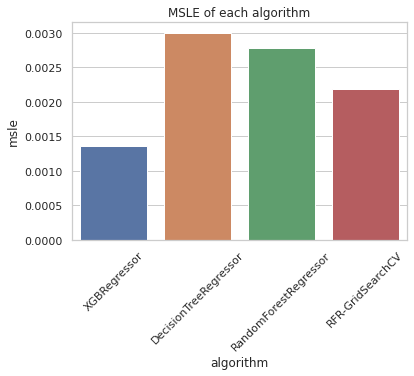

In [156]:
sns.set(style="whitegrid", color_codes=True)
fig = sns.barplot(data=metrics,x='algorithm',y='msle')
plt.xticks(rotation=45)
plt.title('MSLE of each algorithm')
plt.show()

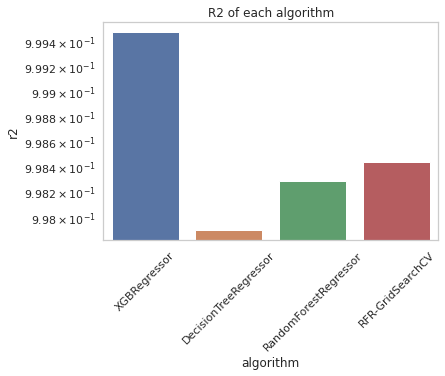

In [157]:
sns.set(style="whitegrid", color_codes=True)
fig = sns.barplot(data=metrics,x='algorithm',y='r2')
fig.set_yscale("log")
plt.xticks(rotation=45)
plt.title('R2 of each algorithm')
plt.show()

# Cálculo del Ahorro

Para calcular el ahorro que se hubiera realizado se tomó el dataset original, aplicamos los filtros de datos iniciales sin mayor cambio adicional, entrenamos un regresor de XGB, el que tuvo mejores métricas, esta vez con todo el dataset que se ha trabajado a lo largo de los avances del reto, y se obtuvieron sus predicciones de costos para finalmente comparar estas predicciones con los datos históricos, a partir de esto se construyó una columna para el dataset original en la cual se obtuvo el ahorro de cada entrada, para finalmente obtener la media de esta columna.

Esta actividad es sumamente importante, ya que a través de ella se podrá consolidar de manera contundente el por qué del modelo. Calculando el ahorro promedio podemos comunicar las ganancias que presenta el modelo. De esta manera analizamos lo que es importante para la compañia y en esos términos obtenemos resultados que se pueden medir y escalar.

In [158]:
real_df = pd.read_csv("/content/gdrive/Shareddrives/Equipa Dinamita Escuadrón Lobo/Data/reto_data.csv")

In [159]:
real_df.fillna(method='ffill', axis=0, inplace=True)
real_df = real_df[(np.abs(stats.zscore(real_df[['Dureza','Asp','Calidad','EE','EC','Tasa_Prod']])) < 3).all(axis=1)]
real_df['Costo'] = real_df['EE'] + real_df['EC']*0.74

indexname = real_df[real_df['Costo'] == 0.0].index
real_df.drop(indexname, inplace= True)
real_df['Costo_P']= real_df.apply(lambda row: row['Costo']/row['Tasa_Prod'], axis = 1)

real_x = real_df[["Dureza","Calidad","Tasa_Prod"]]
real_y = real_df[["EC","EE","Costo_P"]]

In [160]:
xgb = XGBRegressor(objective='reg:squarederror')
multioutputregressor = MultiOutputRegressor(xgb).fit(X_train, y_train)
global_pred = multioutputregressor.predict(real_x) 
for idx, row in enumerate(global_pred):
     for idx2, val in enumerate(row):
         if val < 0:
             global_pred[idx][idx2] = 0

In [161]:
pred_df = pd.DataFrame(global_pred, columns=["EC", "EE", "Costo_P"])
global_msle = MSE_log(real_y, global_pred)
global_r2 = r2_score(real_y, global_pred)

print(f'MSLE: {global_msle}')
print(f'r2: {global_r2}')

real_df['EC_OPT'] = pred_df['EC'].values
real_df['EE_OPT'] = pred_df['EE'].values
real_df['Costo_P_OPT'] = pred_df['Costo_P'].values
real_df["Ahorro_Pond"] = real_df["Costo_P"].values - pred_df['Costo_P'].values
real_df['Ahorro'] = real_df['Ahorro_Pond'].values*real_df['Tasa_Prod'].values
ahorro = real_df["Ahorro"].mean()
print(f"Ahorro que se hubiera realizado: {ahorro}")

MSLE: 2.755991035446776
r2: -5.752456406981921
Ahorro que se hubiera realizado: 21.27202293494309


In [162]:
real_df['Costo'] = real_df["Costo_P"].values*real_df['Tasa_Prod'].values
real_df['Costo_OPT'] = real_df['Costo_P_OPT']*real_df['Tasa_Prod'].values
real_df['Ahorro'] = real_df['Costo'].values-real_df['Costo_OPT'].values
ahorro = real_df["Ahorro"].mean()
print(f"Ahorro que se hubiera realizado: {ahorro}")

Ahorro que se hubiera realizado: 21.27202293494309


In [163]:
real_df['TIME']= pd.to_datetime(real_df['TIME'], dayfirst=True)
real_df.index=real_df['TIME']
#data['Calidad_Bins'] = pd.qcut(data['Calidad'],q=200, duplicates='drop')
GB=real_df.groupby([(real_df.index.day)]).agg({'Ahorro':'mean'})
print(GB)

         Ahorro
TIME           
1     21.170732
2     21.300571
3     21.344082
4     21.118597
5     20.506277
6     20.753381
7     21.083121
8     21.483012
9     20.520321
10    21.040828
11    21.694130
12    20.927764
13    21.694906
14    21.100694
15    21.080040
16    21.215442
17    20.695343
18    21.179466
19    21.456576
20    21.331640
21    21.198511
22    21.232128
23    22.140839
24    21.577742
25    21.677295
26    21.709690
27    21.700162
28    21.050329
29    21.726612
30    21.073148
31    21.998424


In [164]:
real_df.groupby([pd.Grouper(key='TIME', freq='M')]).agg({'Ahorro':'mean'})

Ahorro
TIME                 
1995-01-31  22.332753
1995-02-28  20.443693
1995-03-31  24.694299
1995-04-30  22.248740
1995-05-31  19.026246
...               ...
2020-05-31  26.949323
2020-06-30  24.086507
2020-07-31  23.811922
2020-08-31  21.777656
2020-09-30  25.899272

[309 rows x 1 columns]

# Serialización con Pickle

Para guardar archivos de una manera más similar al estado actual de los datos guardaremos tanto nuestro diccionario de resultados como nuestro dataframe de métricas a archivos independientes de pickle y luego los recuperaremos para comprobar su legibilidad en el futuro.

Se guardó el archivo con el dicionario de resultados, y mi compañero Alberto Cortés guardó el dataframe de métricas con el mismo contenido.

In [ ]:
!pip install pickle5

In [166]:
import pickle
import os
import sys

# Establecemos la ruta de nuestro archivo y su contenido
project_abspathname = os.path.abspath('cemex_results.pkl')

# Guardamos nuestros datos en el archivo
project_pickle = open(str(project_abspathname),'wb')
pickle.dump(results, project_pickle)
project_pickle.close()

In [167]:
# Guardamos directamente nuestro dataframe con ayuda de pandas
metrics.to_pickle("./cemex_metrics.pkl")

In [168]:
# Recuperamos el dataframe para validar información
unpickled_df = pd.read_pickle("/content/cemex_metrics.pkl")
unpickled_df

algorithm      msle        r2
0           XGBRegressor  0.001366  0.999474
1  DecisionTreeRegressor  0.003000  0.997894
2  RandomForestRegressor  0.002786  0.998282
3       RFR-GridSearchCV  0.002181  0.998436

In [169]:
# Usamos un context manager para recuperar nuestro diccionario de resultados
with (open("/content/cemex_results.pkl", "rb")) as openfile:
    while True:
        try:
            unpickled_data = pickle.load(openfile)
        except EOFError:
            break
unpickled_data

{'algorithm': ['XGBRegressor',
  'DecisionTreeRegressor',
  'RandomForestRegressor',
  'RFR-GridSearchCV'],
 'msle': [0.0013658409455244176,
  0.0029997518676794263,
  0.00278577544704685,
  0.0021805520723678948],
 'r2': [0.9994738309449264,
  0.997894159296011,
  0.9982816910875186,
  0.9984362131818297]}

#Aplicación Flask
Primero se instalaron las librerias necesarias para correr una aplicación a través de Google Colab

Seguido de esto entrenamos el modelo con todos los datos optimizados, para asegurarnos de que no hubiera ningún error.

Apoyandonos de recursos que encontramos en Github, logramos hacer la aplicación web. Modificamos una plantilla de estilo y un html de tal manera que se viera presentable. 

In [ ]:
!pip install flask-ngrok

In [171]:
from flask import Flask, request, jsonify, render_template

In [172]:
X = data2.loc[:,['Dureza','Calidad','Tasa_Prod']]
y = data2.loc[:,['EE','EC','Costo_P']]
xgb = XGBRegressor(objective='reg:squarederror')
model = MultiOutputRegressor(xgb).fit(X, y)

In [173]:
import os

if not os.path.exists('templates'):
  os.makedirs('templates')
if not os.path.exists('static'):
  os.makedirs('static')

##Style CSS


In [174]:
style = '''
  @import url(https://fonts.googleapis.com/css?family=Open+Sans);
  .btn { display: inline-block; *display: inline; *zoom: 1; padding: 4px 10px 4px; margin-bottom: 0; font-size: 13px; line-height: 18px; color: #333333; text-align: center;text-shadow: 0 1px 1px rgba(255, 255, 255, 0.75); vertical-align: middle; background-color: #f5f5f5; background-image: -moz-linear-gradient(top, #ffffff, #e6e6e6); background-image: -ms-linear-gradient(top, #ffffff, #e6e6e6); background-image: -webkit-gradient(linear, 0 0, 0 100%, from(#ffffff), to(#e6e6e6)); background-image: -webkit-linear-gradient(top, #ffffff, #e6e6e6); background-image: -o-linear-gradient(top, #ffffff, #e6e6e6); background-image: linear-gradient(top, #ffffff, #e6e6e6); background-repeat: repeat-x; filter: progid:dximagetransform.microsoft.gradient(startColorstr=#ffffff, endColorstr=#e6e6e6, GradientType=0); border-color: #e6e6e6 #e6e6e6 #e6e6e6; border-color: rgba(0, 0, 0, 0.1) rgba(0, 0, 0, 0.1) rgba(0, 0, 0, 0.25); border: 1px solid #e6e6e6; -webkit-border-radius: 4px; -moz-border-radius: 4px; border-radius: 4px; -webkit-box-shadow: inset 0 1px 0 rgba(255, 255, 255, 0.2), 0 1px 2px rgba(0, 0, 0, 0.05); -moz-box-shadow: inset 0 1px 0 rgba(255, 255, 255, 0.2), 0 1px 2px rgba(0, 0, 0, 0.05); box-shadow: inset 0 1px 0 rgba(255, 255, 255, 0.2), 0 1px 2px rgba(0, 0, 0, 0.05); cursor: pointer; *margin-left: .3em; }
  .btn:hover, .btn:active, .btn.active, .btn.disabled, .btn[disabled] { background-color: #e6e6e6; }
  .btn-large { padding: 9px 14px; font-size: 15px; line-height: normal; -webkit-border-radius: 5px; -moz-border-radius: 5px; border-radius: 5px; }
  .btn:hover { color: #333333; text-decoration: none; background-color: #e6e6e6; background-position: 0 -15px; -webkit-transition: background-position 0.1s linear; -moz-transition: background-position 0.1s linear; -ms-transition: background-position 0.1s linear; -o-transition: background-position 0.1s linear; transition: background-position 0.1s linear; }
  .btn-primary, .btn-primary:hover { text-shadow: 0 -1px 0 rgba(0, 0, 0, 0.25); color: #ffffff; }
  .btn-primary.active { color: rgba(255, 255, 255, 0.75); }
  .btn-primary { background-color: #4a77d4; background-image: -moz-linear-gradient(top, #6eb6de, #4a77d4); background-image: -ms-linear-gradient(top, #6eb6de, #4a77d4); background-image: -webkit-gradient(linear, 0 0, 0 100%, from(#6eb6de), to(#4a77d4)); background-image: -webkit-linear-gradient(top, #6eb6de, #4a77d4); background-image: -o-linear-gradient(top, #6eb6de, #4a77d4); background-image: linear-gradient(top, #6eb6de, #4a77d4); background-repeat: repeat-x; filter: progid:dximagetransform.microsoft.gradient(startColorstr=#6eb6de, endColorstr=#4a77d4, GradientType=0);  border: 1px solid #3762bc; text-shadow: 1px 1px 1px rgba(0,0,0,0.4); box-shadow: inset 0 1px 0 rgba(255, 255, 255, 0.2), 0 1px 2px rgba(0, 0, 0, 0.5); }
  .btn-primary:hover, .btn-primary:active, .btn-primary.active, .btn-primary.disabled, .btn-primary[disabled] { filter: none; background-color: #4a77d4; }
  .btn-block { width: 100%; display:block; }

  * { -webkit-box-sizing:border-box; -moz-box-sizing:border-box; -ms-box-sizing:border-box; -o-box-sizing:border-box; box-sizing:border-box; }

  html { width: 100%; height:100%; overflow:hidden; }

  button{
    font-family: 'Ubuntu', sans-serif;   
    width:400px;
    height: 40px;
    line-height: 1;
    font-size: 18px;
    font-weight: bold;
    letter-spacing: 1px;
    border: 3px solid #343a40;
    background: rgba(0,0,0,0.3);;
    color: #343a40;
    border-radius: 4px;
    cursor: pointer;
    overflow: hidden;
    transition: all .35s;
  }

  button:hover{
    background: #343a40;
    color: #fff;
  }

  button span{
    opacity: 1;
    visibility: visible;
    transition: all .35s;
  }

  body { 
    width: 100%;
    height:100%;
    font-family: 'Open Sans', sans-serif;
    color: #fff;
    font-size: 18px;
    text-align:center;
    letter-spacing:1.2px;
    background-color: #013A6B;
    background-image: -webkit-linear-gradient(30deg, #ced4da  50%, #e9ecef  50%);
    min-height: 500px;
      
  }
  .login { 
    margin: 0;
    position: absolute;
    top: 50%;
    left: 50%;
    -ms-transform: translate(-50%, -50%);
    transform: translate(-50%, -50%);
    width:400px;
    height:400px;
  }

  .login h1 { color: #fff; text-shadow: 0 0 10px rgba(0,0,0,0.3); letter-spacing:1px; text-align:center; }

  input { 
    width: 100%; 
    margin-bottom: 10px; 
    background: rgba(0,0,0,0.3);
    border: none;
    outline: none;
    padding: 10px;
    font-size: 13px;
    color: #fff;
    text-shadow: 1px 1px 1px rgba(0,0,0,0.3);
    border: 1px solid rgba(0,0,0,0.3);
    border-radius: 4px;
    box-shadow: inset 0 -5px 45px rgba(100,100,100,0.2), 0 1px 1px rgba(255,255,255,0.2);
    -webkit-transition: box-shadow .5s ease;
    -moz-transition: box-shadow .5s ease;
    -o-transition: box-shadow .5s ease;
    -ms-transition: box-shadow .5s ease;
    transition: box-shadow .5s ease;
  }
  input:focus { box-shadow: inset 0 -5px 45px rgba(100,100,100,0.4), 0 1px 1px rgba(255,255,255,0.2); }
'''
file = open('static/style.css', 'w')
file.write(style)
file.close()

##HTML File

In [175]:
try5 = '''
  <!DOCTYPE html>
  <html >
  <!--From https://codepen.io/frytyler/pen/EGdtg-->
  <head>
    <meta charset="UTF-8">
    <title>ML API</title>
    <link href='https://fonts.googleapis.com/css?family=Pacifico' rel='stylesheet' type='text/css'>
  <link href='https://fonts.googleapis.com/css?family=Arimo' rel='stylesheet' type='text/css'>
  <link href='https://fonts.googleapis.com/css?family=Hind:300' rel='stylesheet' type='text/css'>
  <link href='https://fonts.googleapis.com/css?family=Open+Sans+Condensed:300' rel='stylesheet' type='text/css'>
  <link rel="stylesheet" href="{{ url_for('static', filename='/style.css') }}">
    
  </head>

  <body>
  <div style="position: absolute; left: 3%; top: 5%; user-drag: none;">
    <img style="height: 6em;" src="https://cimav.edu.mx/wp-content/uploads/2015/09/itesm.png">
  </div>

  <div style="position: absolute; left: 12%; top: 5%; user-drag: none;">
    <img style="height: 6em;" src="https://www.cemexventures.com/wp-content/themes/cemexventures/assets/images/landing/sponsors-csc20-cemex-ventures.png">
  </div>
  <div class="login">
    <h1 style="color:#343a40; font-weight: bold">Optimización de energías y costos</h1>

      <!-- Main Input For Receiving Query to our ML -->
      <form action="{{ url_for('predict')}}"method="post">
        <input type="number" name="Dureza" placeholder="Dureza" required="required" />
        <input type="number" step="0.001" name="Calidad" placeholder="Calidad" required="required" />
        <input type="number" name="TasaProd" placeholder="TasaProd" required="required" />
        <button class="" type="submit">Procesar</button>
      </form>

    <br>
    <br>
    <div style="color:#343a40">
      {{ prediction_text }}
    </div>
    
  </div>


  </body>
  </html>'''
file = open('templates/try5.html', 'w')
file.write(try5)
file.close()

##App

In [176]:
from flask_ngrok import run_with_ngrok
app = Flask(__name__) #Initialize the flask App
run_with_ngrok(app)
@app.route('/')
def home():
    return render_template('try5.html')

@app.route('/predict',methods=['POST'])
def predict():
    '''
    For rendering results on HTML GUI
    '''
    int_features = [float(x) for x in request.form.values()]
    final_features = [np.array(int_features)]
    prediction = model.predict(final_features)

    output = np.round(prediction[0], 4)
    
    return render_template('try5.html', prediction_text='Energía eléctrica recomendada: {:.4f}'.format(output[0])+' '
                                        +' Energía calórica recomendada: {:.4f}'.format(output[1])+' '
                                        +' Costo ponderado estimado: ${:.4f}'.format(output[2]))
    #,'Eneregía calórica a usar debería ser:',ec,'El costo ponderado será: $',costo_p)

if __name__ == "__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://8a90de9f1a98.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


##Recursos


1. https://www.analyticsvidhya.com/blog/2020/04/how-to-deploy-machine-learning-model-flask/

2. https://medium.com/@ml_kid/how-to-save-our-model-to-google-drive-and-reuse-it-2c1028058cb2

3. https://deveshsurve.medium.com/running-flask-app-with-google-colab-c9f0c078fb53

4. https://github.com/abhinavsagar/machine-learning-deployment/blob/master/predict%20sales/app.py
https://github.com/MaajidKhan/DeployMLModel-Flask

